F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\PROG_INSTALLED\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

IUGET RAVDESS CNN ON SPECTRO!
Found 1155 images belonging to 8 classes.
Found 285 images belonging to 8 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 540, 108, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 270, 54, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 270, 54, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 135, 27, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 135, 27, 128)      73856     
_______________________

37/37 [==============================] - 60s 2s/step - loss: 0.1480 - acc: 0.9524
Epoch 65/100
37/37 [==============================] - 61s 2s/step - loss: 0.3226 - acc: 0.9022
Epoch 66/100
37/37 [==============================] - 61s 2s/step - loss: 0.1561 - acc: 0.9342
Epoch 67/100
37/37 [==============================] - 62s 2s/step - loss: 0.1141 - acc: 0.9576
Epoch 68/100
37/37 [==============================] - 62s 2s/step - loss: 0.0974 - acc: 0.9680
Epoch 69/100
37/37 [==============================] - 62s 2s/step - loss: 0.1020 - acc: 0.9654
Epoch 70/100
37/37 [==============================] - 60s 2s/step - loss: 0.0845 - acc: 0.9723
Epoch 71/100
37/37 [==============================] - 59s 2s/step - loss: 0.0781 - acc: 0.9714
Epoch 72/100
37/37 [==============================] - 59s 2s/step - loss: 0.0812 - acc: 0.9706
Epoch 73/100
37/37 [==============================] - 59s 2s/step - loss: 0.0799 - acc: 0.9671
Epoch 74/100
37/37 [==============================] - 61s 2s/st

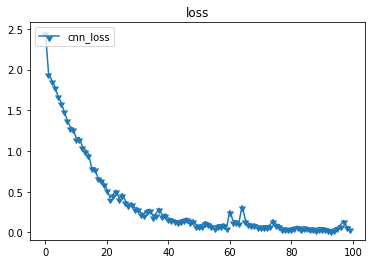

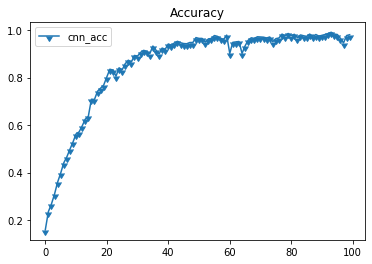

9/9 [==============================] - 6s 646ms/step - loss: 2.6840 - acc: 0.6175
n Test_Accuracy:- 0.6175439
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        18

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285

confusion matrix
[[17  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0]
 [ 0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 18]]


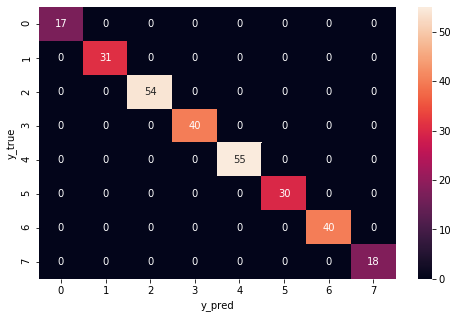

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
import sklearn.metrics
print('IUGET RAVDESS CNN ON SPECTRO!')
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers

#RavdessBySpectrogram_PATH="C:/Users/fijitsu/Documents/A-LABORATORY-PYTHON/DATABASEInThe_STATEofTheART/RAVDESS_by_Spectro/"
#path_dir = RavdessBySpectrogram_PATH
RavdessByMFCCgram_PATH_IUGET="C:/Users/INSIDE BINARIES/Documents/LABO_PYTHON/DATASET/RAVDESS_by_Spectro/"
path_dir = RavdessByMFCCgram_PATH_IUGET

datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(1080,216),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(1080,216),
    subset='validation'
)

IMAGE_HEIGHT=216
IMAGE_WIDTH=1080
N_CHANNELS=3
N_CLASSES=8
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
#model.compile(
#    loss='sparse_categorical_crossentropy',
#   optimizer=tf.keras.optimizers.RMSprop(),
#    metrics=['accuracy'],
#)

# Train model for 10 epochs, capture the history
#history_cnn = model.fit(train_generator, epochs=10, validation_data=validation_generator)


##FINISH MODIFICATION
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model.fit(train_generator,batch_size=32,epochs=100)
model.save('80K_CNNmodelUsingRAVDESSDataSet_SPECTRO_IUGET.h5')
yhat = model.predict(train_generator)


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["acc"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#Fonction pour Encoder un fichier Audio en Spectrogramme

In [25]:
#Fonction qui prend en entrée un spectrogramme et donne en sortie une émotion
import tensorflow as tf
#Dictionnaires d'émotions
Emotions_Dictionary={0:'Neutral',1:'Calm',2:'Happy',3:'Sad',4:'Angry',5:'Fearful',6:'Disgust',7:'Surpise'}
def EmotionsPredictionFormSpectrogrammee(SpectrogramUtteranceFolder):
    #Charger les SpectroGramme des prises de paroles (classés par ordre chrnologique_alphanumérique dans le repertoire)
    path_dir = SpectrogramUtteranceFolder
    PrisesDeParole_datagen = ImageDataGenerator(
                    rescale=1./255)
    PrisesDeParole_generator = PrisesDeParole_datagen.flow_from_directory(
    path_dir,
    target_size=(1080,216),
    shuffle=False)
    
    #charger le model pré entrainé
    #Pretrained_Model_PATH='C:/Users/fijitsu/Documents/A-LABORATORY-PYTHON/PretrainedCnnModel/model_4.h5'
    #MyPretrained_Model = tf.keras.models.load_model('MyPretrainedModel')
    MyPretrained_Model=model
    
    #Prediction des emotions
    pred = MyPretrained_Model.predict(PrisesDeParole_generator)
    y_pred = np.argmax(pred, axis=1)
    #Display result
    print(y_pred)
    return y_pred

    

In [29]:
##Testons voir
##SpectrogramUtteranceFolder='./SpectrogrammeLocuteurX/'

#SpectrogramUtteranceFolder=RavdessBySpectrogram_PATH+''
SpectrogramUtteranceFolder="C:/Users/INSIDE BINARIES/Documents/LABO_PYTHON/DATASET/PredictionMFCC/"
PredictedEmotions_labels=EmotionsPredictionFormSpectrogrammee(SpectrogramUtteranceFolder)
print('les émotions contenus dans les prises de parole:',[Emotions_Dictionary[ii] for ii in PredictedEmotions_labels])


Found 400 images belonging to 1 classes.
[6 3 1 6 1 3 3 3 1 3 6 1 1 3 3 1 6 1 1 6 6 1 6 6 3 6 1 3 1 1 3 1 1 3 3 6 3
 6 3 6 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 6 3 2 6 3 3 3 6 3 3 3 3 3 6
 6 6 3 3 6 3 3 3 3 3 3 3 2 3 3 3 3 1 6 6 1 6 6 6 1 3 3 3 6 6 6 1 1 3 3 1 2
 3 3 6 3 3 3 3 3 3 3 3 3 6 3 3 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3
 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 5 3 3 3 6 3 3 3 5 3 3
 3 7 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3
 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3
 3 3 3 2 3 6 3 3 6 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 5 3 1 5 3 3 3 3 3
 3 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 5 3 3
 6 3 3 3 3 3 3 6 6 6 6 2 6 6 3 1 6 1 3 3 3 3 3 6 6 3 2 3 3 3 3 6 6 3 6 6 6
 6 3 3 6 6 6 6 6 6 6 6 3 3 3 3 3 6 1 1 3 1 3 3 6 2 1 3 6 6 3]
les émotions contenus dans les prises de parole: ['Disgust', 'Sad', 'Calm', 'Disgust', 'Calm', 'Sad', 'Sad', 'Sad', 'Calm', 'Sad', 'Disgust', 'Calm

In [34]:
print(list(PredictedEmotions_labels).count(6)*100 / len(list(PredictedEmotions_labels)))


16.25


In [36]:

#yhat = model.predict(train_generator)

path_dir = './SpectrogrammeLocuteurX/'

PrisesDeParole_datagen = ImageDataGenerator(
                    rescale=1./255)
PrisesDeParole_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=False
)


pred = model.predict(PrisesDeParole_generator)
y_pred = np.argmax(pred, axis=1)
print(y_pred)


Found 11 images belonging to 4 classes.
[0 0 0 0 1 1 5 5 5 5 6]


In [53]:

print(7*24*2*2*2+1*24*2*2)
print((187+201+203+192+191+96+191+192)/8)
print((7*192+96)/8)

1440
181.625
180.0


In [51]:
print(1*24*1*2*2)

96


In [52]:
print(24*2*2*2)

192


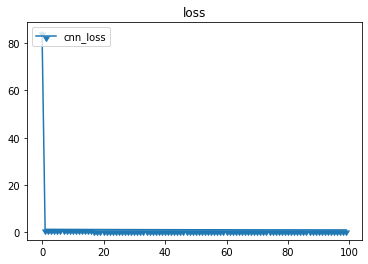

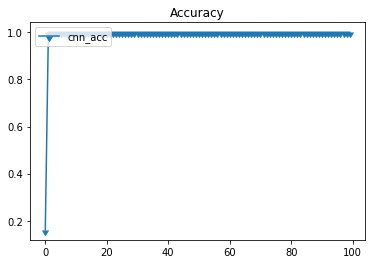

14/14 [==============================] - 10s 687ms/step - loss: 16.9899 - acc: 0.1218
n Test_Accuracy:- 0.12177986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        97
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00       312
           7       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       427
   macro avg       0.62      0.62      0.62       427
weighted avg       1.00      1.00      1.00       427

confusion matrix
[[  3   0   0   0   0]
 [  0  14   0   0   0]
 [  0   0  97   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 312]]


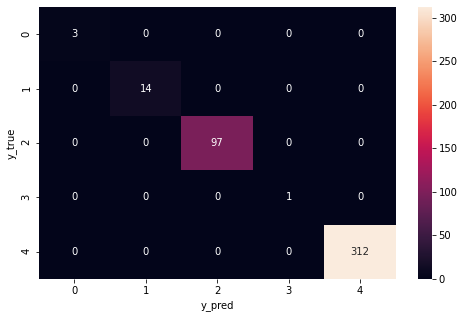

In [15]:
model.save('K_CNNmodelUsingRAVDESSDataSet.h5')
yhat = model.predict(train_generator)


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["acc"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [25]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.3)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    subset='validation'
)


32/32 [==============================] - 24s 740ms/step - loss: 3.7440 - acc: 0.2616
n Test_Accuracy:- 0.2615992


In [38]:
accuracy = model.evaluate(train_generator)
print('n', 'Test_Accuracy:-', accuracy[1])


32/32 [==============================] - 12s 383ms/step - loss: 0.0026 - acc: 1.0000
n Test_Accuracy:- 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       135
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       135
           7       1.00      1.00      1.00       135

    accuracy                           1.00      1013
   macro avg       1.00      1.00      1.00      1013
weighted avg       1.00      1.00      1.00      1013

confusion matrix
[[ 68   0   0   0   0   0   0   0]
 [  0 135   0   0   0   0   0   0]
 [  0   0 135   0   0   0   0   0]
 [  0   0   0 135   0   0   0   0]
 [  0   0   0   0 135   0   0   0]
 [  0   0   0   0   0 135   0   0]
 [  0   0   0   0   0   0 135   0]
 [  0   0   0   0   0   0   0 135]]


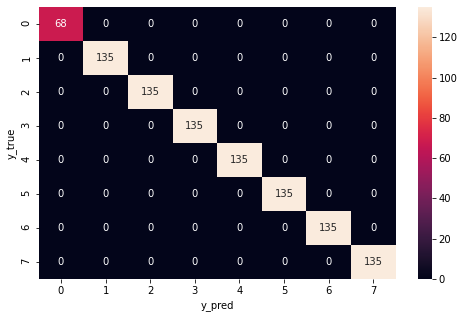

In [39]:
pred = model.predict(train_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()